In [98]:
import tensorflow as tf

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
from keras import Sequential

In [101]:
df = pd.read_csv("J:/Data science/data/breast_cancer.csv")

In [102]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
df.shape

(569, 32)

In [104]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [105]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [106]:
df = pd.get_dummies(df)
df.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1


In [107]:
x = df.drop('id',axis=1)
x.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0,1


In [108]:
y = df[['diagnosis_B','diagnosis_M']]
y.head()

,diagnosis_B,diagnosis_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [111]:
x_train

array([[-0.24158009, -0.25233871, -0.28593015, ..., -0.82628364,
         0.76396539, -0.76396539],
       [-0.39595215, -0.49936108, -0.43539869, ..., -0.60536547,
         0.76396539, -0.76396539],
       [ 0.21592257, -0.38162145,  0.18779528, ..., -0.62991193,
         0.76396539, -0.76396539],
       ...,
       [ 0.57238169,  0.077794  ,  0.52348693, ..., -1.11975024,
        -1.30895981,  1.30895981],
       [ 1.33020818,  0.48872842,  1.29124883, ...,  0.78014602,
        -1.30895981,  1.30895981],
       [-0.09001479, -0.14614217, -0.10419927, ...,  0.32249085,
         0.76396539, -0.76396539]])

In [112]:
x_test

array([[-0.46892803, -0.17846286, -0.50114851, ..., -0.68445963,
         0.76396539, -0.76396539],
       [ 0.00260845, -0.76946966, -0.06131895, ..., -0.65773126,
         0.76396539, -0.76396539],
       [-0.31455597, -0.68866795, -0.35739735, ..., -0.81319219,
         0.76396539, -0.76396539],
       ...,
       [ 1.0018167 ,  0.92736629,  1.13197908, ...,  2.07292642,
        -1.30895981,  1.30895981],
       [-0.67662863, -0.26157319, -0.6085535 , ...,  0.45285984,
         0.76396539, -0.76396539],
       [ 0.4123961 ,  0.40792671,  0.47448085, ...,  1.11288697,
        -1.30895981,  1.30895981]])

In [113]:
y_train , y_test

(     diagnosis_B  diagnosis_M
 464            1            0
 454            1            0
 447            1            0
 363            1            0
 241            1            0
 ..           ...          ...
 552            1            0
 393            0            1
 75             0            1
 337            0            1
 523            1            0
 
 [426 rows x 2 columns],
      diagnosis_B  diagnosis_M
 107            1            0
 437            1            0
 195            1            0
 141            0            1
 319            1            0
 ..           ...          ...
 56             0            1
 116            1            0
 468            0            1
 469            1            0
 417            0            1
 
 [143 rows x 2 columns])

In [114]:
x_train.shape

(426, 32)

In [115]:
tf.random.set_seed(42)
model = Sequential([
    tf.keras.Input(shape=(32,)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(3,activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

In [116]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [117]:
model_history = model.fit(x_train , y_train , validation_split=0.1, epochs=10)
model_history

Epoch 1/10
12/12 [==============================] - 1s 13ms/step - loss: 0.7083 - accuracy: 0.5640 - val_loss: 0.6929 - val_accuracy: 0.6047
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.8042 - val_loss: 0.6385 - val_accuracy: 0.8837
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.9321 - val_loss: 0.5948 - val_accuracy: 0.9302
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.9687 - val_loss: 0.5607 - val_accuracy: 0.9767
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.9843 - val_loss: 0.5266 - val_accuracy: 0.9767
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.9843 - val_loss: 0.4900 - val_accuracy: 0.9767
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.9896 - val_loss: 0.4509 - val_accuracy: 0.9767
Epoch 8/10
12/12 [=

In [118]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.9860


[0.331646203994751, 0.9860140085220337]

In [119]:
model_history.history

{'loss': [0.7082663774490356,
  0.6512883901596069,
  0.6064298748970032,
  0.5718139410018921,
  0.5394339561462402,
  0.5047826170921326,
  0.46725666522979736,
  0.42726147174835205,
  0.3854573369026184,
  0.3439016044139862],
 'accuracy': [0.5639686584472656,
  0.8041775226593018,
  0.9321148991584778,
  0.9686684012413025,
  0.9843342304229736,
  0.9843342304229736,
  0.9895561337471008,
  0.9895561337471008,
  0.9921671152114868,
  0.9921671152114868],
 'val_loss': [0.6928861737251282,
  0.6384621858596802,
  0.594817042350769,
  0.5606610774993896,
  0.5266199111938477,
  0.49003031849861145,
  0.4509342908859253,
  0.41020137071609497,
  0.36860358715057373,
  0.3274933695793152],
 'val_accuracy': [0.604651153087616,
  0.8837209343910217,
  0.930232584476471,
  0.9767441749572754,
  0.9767441749572754,
  0.9767441749572754,
  0.9767441749572754,
  0.9767441749572754,
  0.9767441749572754,
  0.9767441749572754]}

In [120]:
y_pred = model.predict(x_test)
y_pred

5/5 [==============================] - 0s 0s/step


array([[0.6893345 , 0.14138135],
       [0.62878495, 0.24774571],
       [0.6755083 , 0.16245757],
       [0.34330934, 0.5796667 ],
       [0.753782  , 0.06721773],
       [0.70023334, 0.12610732],
       [0.7123112 , 0.1105326 ],
       [0.09305379, 0.8054162 ],
       [0.66032875, 0.18780592],
       [0.6827883 , 0.15112169],
       [0.25245023, 0.728983  ],
       [0.66706467, 0.17627233],
       [0.6138343 , 0.27938434],
       [0.7005393 , 0.12569538],
       [0.2979204 , 0.7097412 ],
       [0.7109531 , 0.11221416],
       [0.68603224, 0.14624149],
       [0.68154377, 0.15302198],
       [0.1704763 , 0.65243405],
       [0.5100094 , 0.5450364 ],
       [0.64473075, 0.21624438],
       [0.75640416, 0.06497084],
       [0.6331116 , 0.19199441],
       [0.66437405, 0.18082486],
       [0.11986759, 0.46404845],
       [0.67036754, 0.1707831 ],
       [0.26527634, 0.71854043],
       [0.8046433 , 0.03254851],
       [0.22192378, 0.67492026],
       [0.29845494, 0.7422467 ],
       [0.

In [121]:
# y_pred = (y_pred > 0.5)
# y_pred

In [122]:
Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]


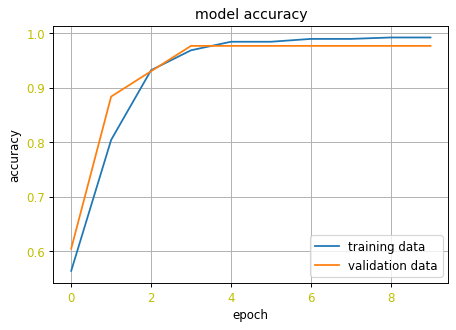

In [123]:
plt.figure(dpi=85)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.xticks(c='y')
plt.yticks(c='y')
plt.legend(['training data', 'validation data'], loc = 'lower right')

In [124]:
y_ = y_test.drop('diagnosis_B',axis=1)
y_

,diagnosis_M
107,0
437,0
195,0
141,1
319,0
...,...
56,1
116,0
468,1
469,0


In [127]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix
conf = confusion_matrix(y_,Y_pred_labels)
conf

array([[86,  2],
       [ 0, 55]], dtype=int64)

In [134]:
y_

,diagnosis_M
107,0
437,0
195,0
141,1
319,0
...,...
56,1
116,0
468,1
469,0


In [149]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(8,9), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels),
         
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [148]:
# Y_pred_labels

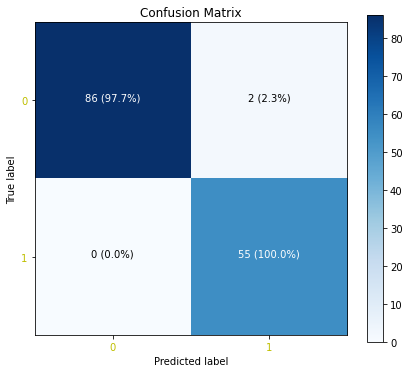

In [150]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=Y_pred_labels,
#                       classes=class_names,
                      figsize=(7,6),
                      text_size=10)
plt.xticks(c='y' , size='10')
plt.yticks(c='y' , size='10');